<a href="https://colab.research.google.com/github/Aline-Noronha/ImersaoDadosEnem2019/blob/muheres-sc/Mulheres_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte = "https://raw.githubusercontent.com/Aline-Noronha/ImersaoDadosEnem2019/muheres-sc/mulheres-sc.csv"

dados = pd.read_csv(fonte, error_bad_lines=False)
dados.head()

,Unnamed: 0,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,1,10328,190001014955,2019,4209102,Joinville,42,SC,20,F,1,1,1,1501402.0,Belém,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,A,F,5,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
1,2,36881,190001041509,2019,4211306,Navegantes,42,SC,18,F,1,3,1,1501402.0,Belém,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,A,C,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A
2,3,59150,190001063779,2019,4200606,Águas Mornas,42,SC,22,F,1,5,1,1501402.0,Belém,15.0,PA,2,0,2,NaN,0,42006155.0,4215703.0,Santo Amaro da Imperatriz,42.0,SC,3.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,F,C,D,3,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,B,B,A,A,B
3,4,85260,190001089889,2019,4205407,Florianópolis,42,SC,21,F,1,2,1,1100130.0,Machadinho D'Oeste,11.0,RO,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
4,5,98168,190001102797,2019,4208203,Itajaí,42,SC,29,F,1,1,1,2111300.0,São Luís,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,CBBCDACAABDCACACAEDCEAEAEDDECABADAAEEACDACECB,99999CEDCABCAAEDDDEDAADAEDBCEADCECCBDBEAEDABED...,DCBCBBBBBDEDCEBECCCAEBDBDBCBBEBAAAAB.CBCBEDDD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,100.0,120.0,100.0,560.0,D,E,C,C,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B


In [24]:
# Tamanho da base de dados:
dados.shape

(65637, 138)

In [25]:
# Variáveis das colunas:
dados.columns.values

array(['Unnamed: 0', 'ID', ' NU_INSCRICAO', 'NU_ANO',
       'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO',
       'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC',
       'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
       'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAI

In [22]:
dados.columns.view()

Index(['Unnamed: 0', 'ID', ' NU_INSCRICAO', 'NU_ANO',
       'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA',
       'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025 '],
      dtype='object', length=138)

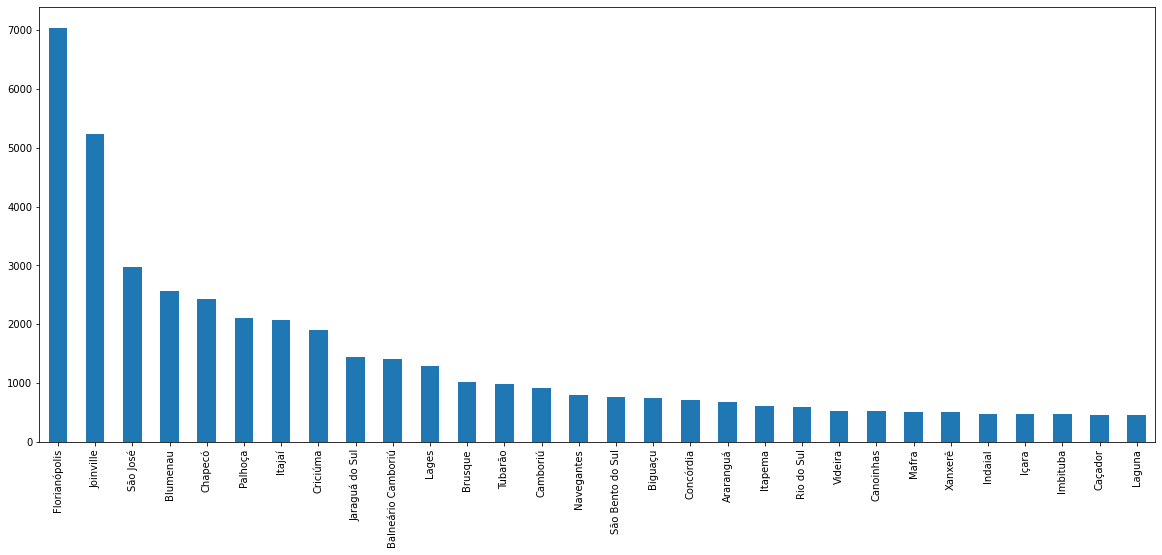

In [23]:
dados["NO_MUNICIPIO_RESIDENCIA"].value_counts().nlargest(30).plot.bar(figsize=(20,8))

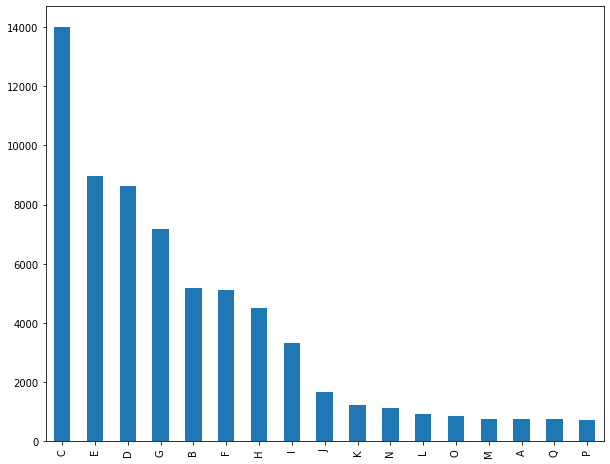

In [ ]:
# Gráfico de número de inscritos pela renda.
dados["Q006"].value_counts().plot.bar(figsize=(10,8))

In [26]:
dados["NU_IDADE"].value_counts().sort_index()

1      1
10     1
12     1
13     5
14    50
      ..
67     2
68     1
69     1
72     1
79     1
Name: NU_IDADE, Length: 62, dtype: int64

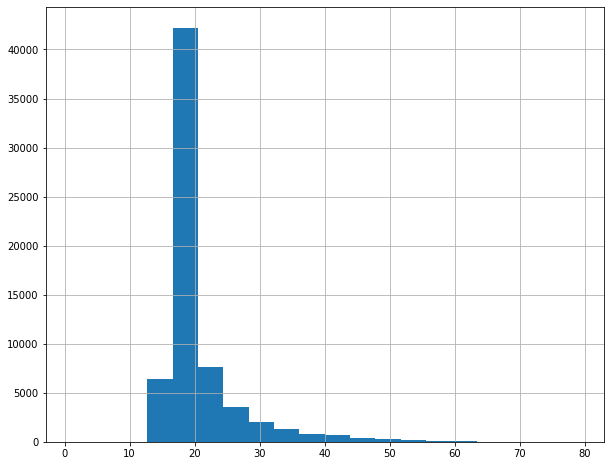

In [27]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8))

In [28]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,47375.000000,50892.000000,47375.000000,50892.000000,50892.000000
mean,485.223398,521.387833,530.833395,534.253602,590.556866
std,73.912697,75.584786,102.316539,55.270120,173.787149
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,427.400000,472.100000,448.200000,503.000000,520.000000
50%,482.000000,527.750000,516.800000,538.700000,600.000000
75%,540.000000,574.400000,602.800000,572.000000,680.000000
max,815.100000,799.400000,953.700000,719.700000,980.000000


In [29]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

In [30]:

dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,Unnamed: 0,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,1,10328,190001014955,2019,4209102,Joinville,42,SC,20,F,1,1,1,1501402.0,Belém,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,A,F,5,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
1,2,36881,190001041509,2019,4211306,Navegantes,42,SC,18,F,1,3,1,1501402.0,Belém,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,A,C,4,B,A,B,A,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
2,3,59150,190001063779,2019,4200606,Águas Mornas,42,SC,22,F,1,5,1,1501402.0,Belém,15.0,PA,2,0,2,NaN,0,42006155.0,4215703.0,Santo Amaro da Imperatriz,42.0,SC,3.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,F,C,D,3,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,B,B,A,A,B,0.0
3,4,85260,190001089889,2019,4205407,Florianópolis,42,SC,21,F,1,2,1,1100130.0,Machadinho D'Oeste,11.0,RO,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,0.0
4,5,98168,190001102797,2019,4208203,Itajaí,42,SC,29,F,1,1,1,2111300.0,São Luís,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999CEDCABCAAEDDDEDAADAEDBCEADCECCBDBEAEDABED...,DCBCBBBBBDEDCEBECCCAEBDBDBCBBEBAAAAB.CBCBEDDD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,100.0,120.0,100.0,560.0,D,E,C,C,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,2565.9


Text(0.5, 1.0, 'Nota total vs renda')

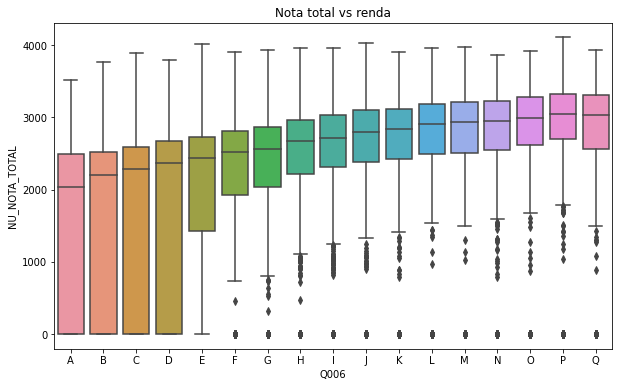

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Nota total vs renda")

Text(0.5, 1.0, 'Renda e Raça')

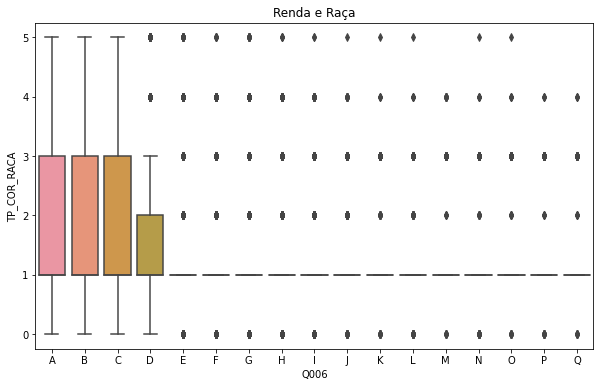

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "TP_COR_RACA", data = dados, order = renda_ordenada)
plt.title("Renda e Raça")

In [35]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,0.0
5,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
65623,NaN,NaN,NaN,NaN,NaN,0.0
65625,NaN,NaN,NaN,NaN,NaN,0.0
65628,NaN,NaN,NaN,NaN,NaN,0.0
65630,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
provas.append("NU_NOTA_TOTAL")
dados[provas].query("NU_NOTA_TOTAL > 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
4,525.9,440.5,549.0,490.5,560.0,2565.9
9,475.4,479.2,431.0,535.0,360.0,2280.6
10,593.7,591.8,622.1,592.7,900.0,3300.3
11,592.2,512.4,502.0,577.5,680.0,2864.1
12,439.7,523.3,614.0,557.7,540.0,2674.7
...,...,...,...,...,...,...
65631,449.6,558.5,645.0,573.8,640.0,2866.9
65632,558.3,613.2,604.0,518.8,600.0,2894.3
65633,466.4,420.3,517.9,497.8,340.0,2242.4
65635,496.3,556.2,698.7,574.1,940.0,3265.3


In [37]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,Unnamed: 0,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
4,5,98168,190001102797,2019,4208203,Itajaí,42,SC,29,F,1,1,1,2111300.0,São Luís,21.0,MA,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999CEDCABCAAEDDDEDAADAEDBCEADCECCBDBEAEDABED...,DCBCBBBBBDEDCEBECCCAEBDBDBCBBEBAAAAB.CBCBEDDD,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,100.0,120.0,100.0,560.0,D,E,C,C,4,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B,2565.9
9,11,275275,190001279908,2019,4202008,Balneário Camboriú,42,SC,28,F,2,1,1,4202008.0,Balneário Camboriú,42.0,SC,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999CAEDBDEBABDDBEBDACECADEECDCEDCEEEEACDDDDC...,BCCBCEEECAECACBCCBEECBCEDDACDBADBCBBDCADCADBE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,140.0,40.0,40.0,100.0,40.0,360.0,C,E,C,D,2,D,A,B,C,B,A,B,A,B,A,B,A,A,B,A,A,C,A,B,B,2280.6
10,13,290309,190001294942,2019,4209300,Lages,42,SC,21,F,2,1,1,3304557.0,Rio de Janeiro,33.0,RJ,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,BDABE99999ECDAACDBECAAAEABDEEECCECCDEBEACDBBBC...,DBCBACCDCDEDEEBACBBBDCEAECCEEBACCABADCDBCDCCB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,200.0,160.0,180.0,200.0,900.0,F,E,E,D,2,I,A,C,D,B,A,B,A,B,A,B,A,B,C,A,A,C,B,C,B,3300.3
11,14,302417,190001307051,2019,4202909,Brusque,42,SC,18,F,1,1,1,4202909.0,Brusque,42.0,SC,2,0,3,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999DAEBAABBCECCCAECCDCDAAECCADAEDCDEAEBAECEC...,CBEABBADEACBACECDDAECBCBADEECBBBECABCADEBDCAD,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,120.0,160.0,160.0,80.0,680.0,E,D,B,B,6,C,A,B,C,A,B,B,A,A,A,B,A,A,B,A,A,B,A,A,A,2864.1
12,15,317943,190001322579,2019,4205407,Florianópolis,42,SC,21,F,0,3,1,3550308.0,São Paulo,35.0,SP,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,ADBBE99999ABECCCCAEEACDABBACDCDADBDDDAAEBEECCD...,DEBBACCDBAABCBCEEBDBBBACAEDECDDBAAADCDBDDACEB,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,120.0,80.0,120.0,540.0,C,D,B,B,2,C,A,B,B,A,A,B,B,B,B,A,A,A,A,A,A,C,A,B,B,2674.7


In [38]:
dados_renda_a = dados.query("Q006 == 'A'")
dados_renda_a.head()

,Unnamed: 0,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
8,10,237597,190001242230,2019,4202404,Blumenau,42,SC,19,F,2,0,1,2925006.0,Planalto,29.0,BA,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,F,B,2,A,A,B,C,A,A,B,A,A,A,B,A,A,B,A,A,C,A,A,B,0.0
15,21,575237,190001579880,2019,4218954,Urupema,42,SC,19,F,1,1,1,4314902.0,Porto Alegre,43.0,RS,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999EEAADCCABEEEBCCCAEACCDEBCEABBDCADEEECEBCE...,ACCBABACAADECDBECBAAECEDCCCEBDAEDCBDCABEEDAEA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,B,B,1,A,A,B,B,A,A,B,A,B,A,B,A,A,B,A,A,B,A,A,A,2318.8
249,337,679998,190001684642,2019,4209300,Lages,42,SC,32,F,1,3,1,4116802.0,Nova Cantu,41.0,PR,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999DBDBCEDECEBEEABDEEECBAEDEBCDEAAAEDAADBBED...,ACADBADCDABAAAACBACDBEBDCAAECACEEACBAADAACADB,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,80.0,80.0,40.0,420.0,A,B,F,B,4,A,A,B,D,A,A,B,A,A,A,A,A,A,A,A,A,B,A,B,B,2176.3
430,599,680428,190001685072,2019,4204202,Chapecó,42,SC,18,F,1,1,1,4305801.0,Constantina,43.0,RS,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,99999CCCEABDEBCDEBEBDAADBEECDBCBADACBBDAADCCCC...,BEADCEEBDCBEDDCCABBAACECBDCBBBECDEEBEBEAEECEB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,160.0,120.0,160.0,140.0,740.0,C,C,A,A,3,A,A,B,D,A,B,B,B,A,A,A,A,A,B,A,A,C,A,A,A,2814.9
566,803,680635,190001685279,2019,4219358,Vitor Meireles,42,SC,20,F,1,1,1,4219358.0,Vitor Meireles,42.0,SC,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,...,DBBAE99999BDCEBDBAEBDACDDDDEDECEECDCAEAAACECCC...,BACECBDADCCCBEBCCDEABECEDCDAACCCECACCEBCDECBC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,100.0,100.0,100.0,60.0,460.0,C,C,A,A,2,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,A,2449.9


Nota total das mulheres que possuem renda familiar A:

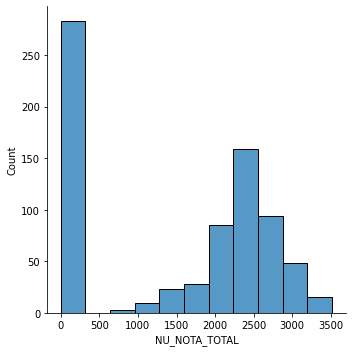

In [99]:
sns.displot(data=dados_renda_a, x="NU_NOTA_TOTAL")

Todas as notas das mulheres pertencentes a renda A:


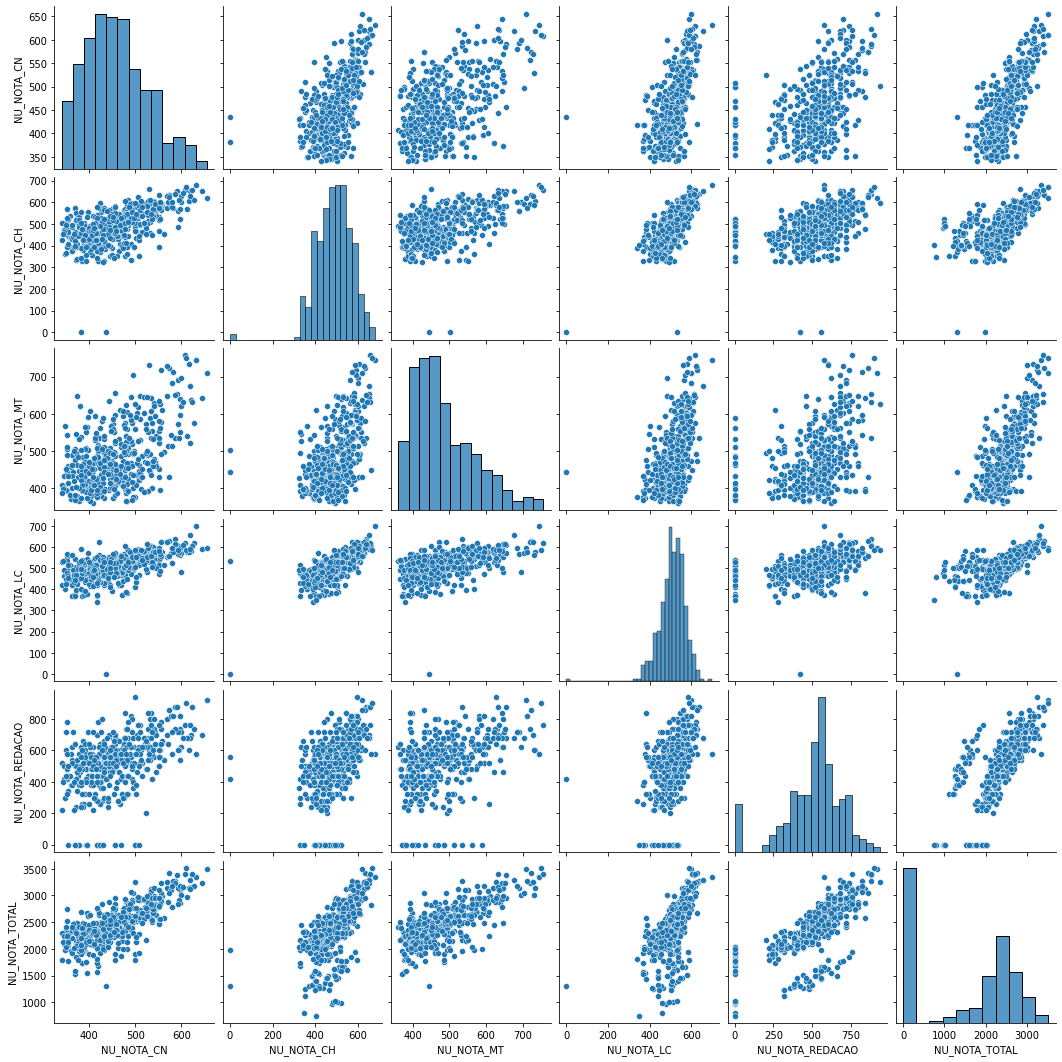

In [100]:
sns.pairplot(dados_renda_a[provas])

Text(0.5, 1.0, ' Nota total pela renda de treineiros e não treineiros')

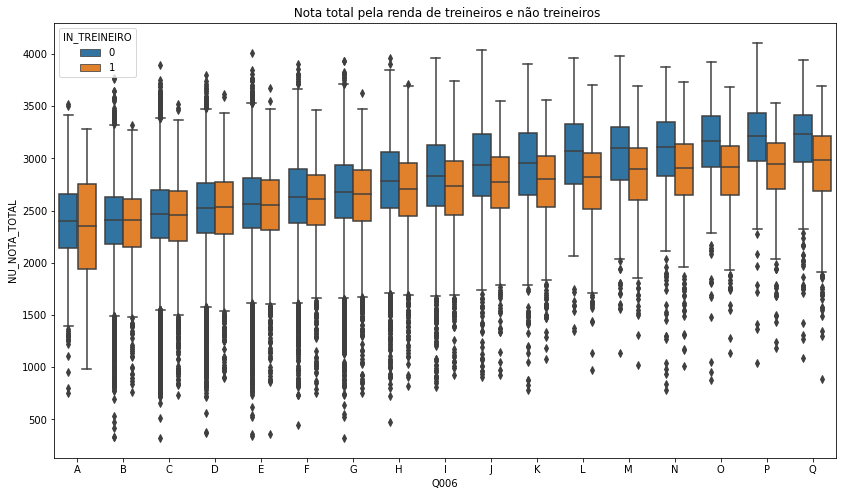

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title(" Nota total pela renda de treineiros e não treineiros")

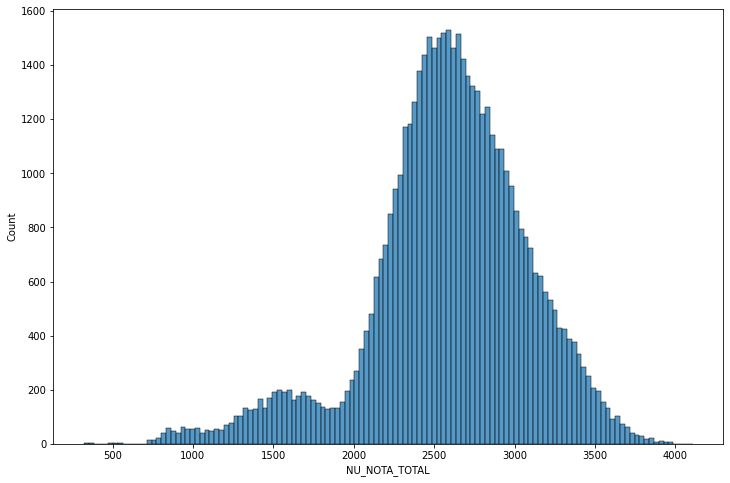

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL")

In [42]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [43]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]



In [44]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
4,440.5,490.5,525.9,560.0
9,479.2,535.0,475.4,360.0
10,591.8,592.7,593.7,900.0
11,512.4,577.5,592.2,680.0
12,523.3,557.7,439.7,540.0
...,...,...,...,...
65631,558.5,573.8,449.6,640.0
65632,613.2,518.8,558.3,600.0
65633,420.3,497.8,466.4,340.0
65635,556.2,574.1,496.3,940.0


In [45]:
x = notas_entrada
y = notas_saida 

In [46]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [47]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [48]:
predicoes_matematica = modelo.predict(x_teste)

In [50]:
y_teste[:5]

1968     487.5
53367    423.8
23452    680.7
55933    400.9
47265    684.4
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

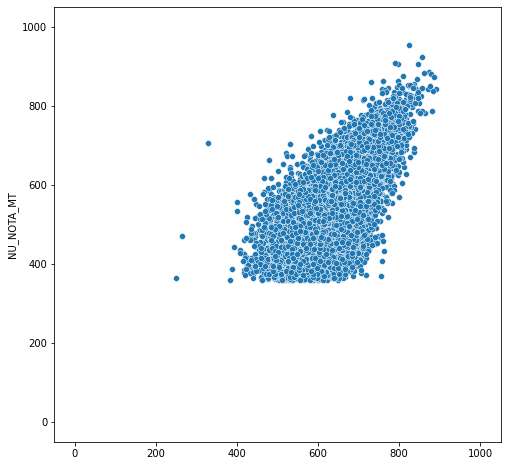

In [51]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

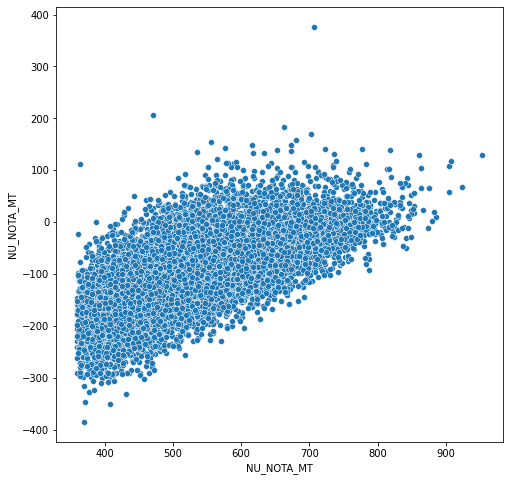

In [52]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)


(-50.0, 1050.0)

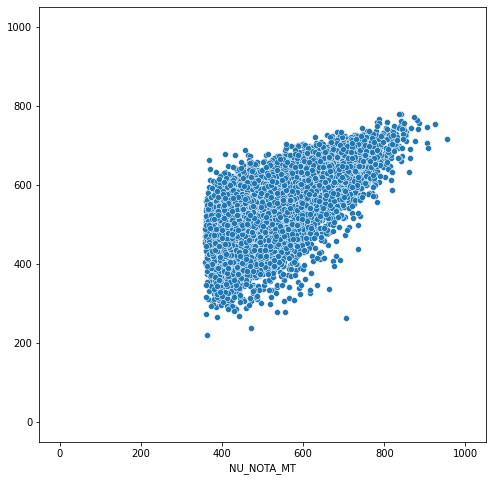

In [53]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [54]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [55]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
1968,487.5,597.692972,-110.192972,12142.491165
53367,423.8,507.805533,-84.005533,7056.929589
23452,680.7,750.251794,-69.551794,4837.452017
55933,400.9,512.338790,-111.438790,12418.603929
47265,684.4,741.653482,-57.253482,3277.961200
...,...,...,...,...
61543,567.9,653.168106,-85.268106,7270.649850
41827,381.5,581.908483,-200.408483,40163.559889
12844,528.1,634.388186,-106.288186,11297.178511
19014,597.2,642.093172,-44.893172,2015.396914


In [56]:
resultados["quadrado_diferenca"].mean()

14256.371666369017

In [57]:
resultados["quadrado_diferenca"].mean()**(1/2)

119.40004885413163

In [58]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [59]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

10492.818677203284

In [60]:
mean_squared_error(y_teste, predicoes_matematica)

14256.37166636905

In [61]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematica = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


14256.37166636905

In [62]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)


5631.761501155571

In [63]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()



In [64]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 5672.7726857551725 - 6361.376310428544


In [66]:
resultados["test_score"]*-1

array([5767.05603481, 6013.13698932, 5980.92758841, 5657.41305067,
       6060.60147446, 6216.81029222, 6133.28032205, 6150.41570129,
       6189.8428969 , 6001.2606308 ])

In [65]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [67]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5462.47031369799 - 5753.875297379962


In [68]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5255.222009422887|Teste = 5357.569751704422


In [74]:
for i in range(1,21):
  regressor_arvore(i)

Treino = 7142.867719371822|Teste = 7189.357530090043
Treino = 5964.4590161320675|Teste = 6025.333766912092
Treino = 5521.920906660851|Teste = 5608.172805538976
Treino = 5255.222009422887|Teste = 5357.569751704422
Treino = 5075.601183403949|Teste = 5194.9542318323565
Treino = 4946.31078184382|Teste = 5114.105604595623
Treino = 4836.956287024221|Teste = 5063.235783176511
Treino = 4725.235434644086|Teste = 5096.677022836289
Treino = 4586.77842872662|Teste = 5211.772733606468
Treino = 4401.305952442022|Teste = 5397.992521479113
Treino = 4165.2955347547995|Teste = 5658.048783361495
Treino = 3890.82052630258|Teste = 5967.154137149551
Treino = 3573.2163810059915|Teste = 6347.713106099706
Treino = 3234.1278375900474|Teste = 6713.894538644968
Treino = 2879.9264768269095|Teste = 7112.060168324284
Treino = 2521.6045594077596|Teste = 7530.069257702542
Treino = 2176.3745716266026|Teste = 7934.886122740505
Treino = 1851.0954795031314|Teste = 8282.570230254223
Treino = 1549.7873463676656|Teste = 8595